In [8]:
%matplotlib notebook

In [ ]:
# https://stackoverflow.com/questions/37327308/add-alpha-to-an-existing-matplotlib-colormap

In [11]:
import numpy as np
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [33]:
# import matplotlib.pylab as pl
# from matplotlib.colors import ListedColormap

# cmap = pl.cm.binary

# my_cmap = cmap(np.arange(cmap.N))

# my_cmap[:,-1] = np.linspace(0, 1, cmap.N)

# my_cmap = ListedColormap(my_cmap)

<IPython.core.display.Javascript object>


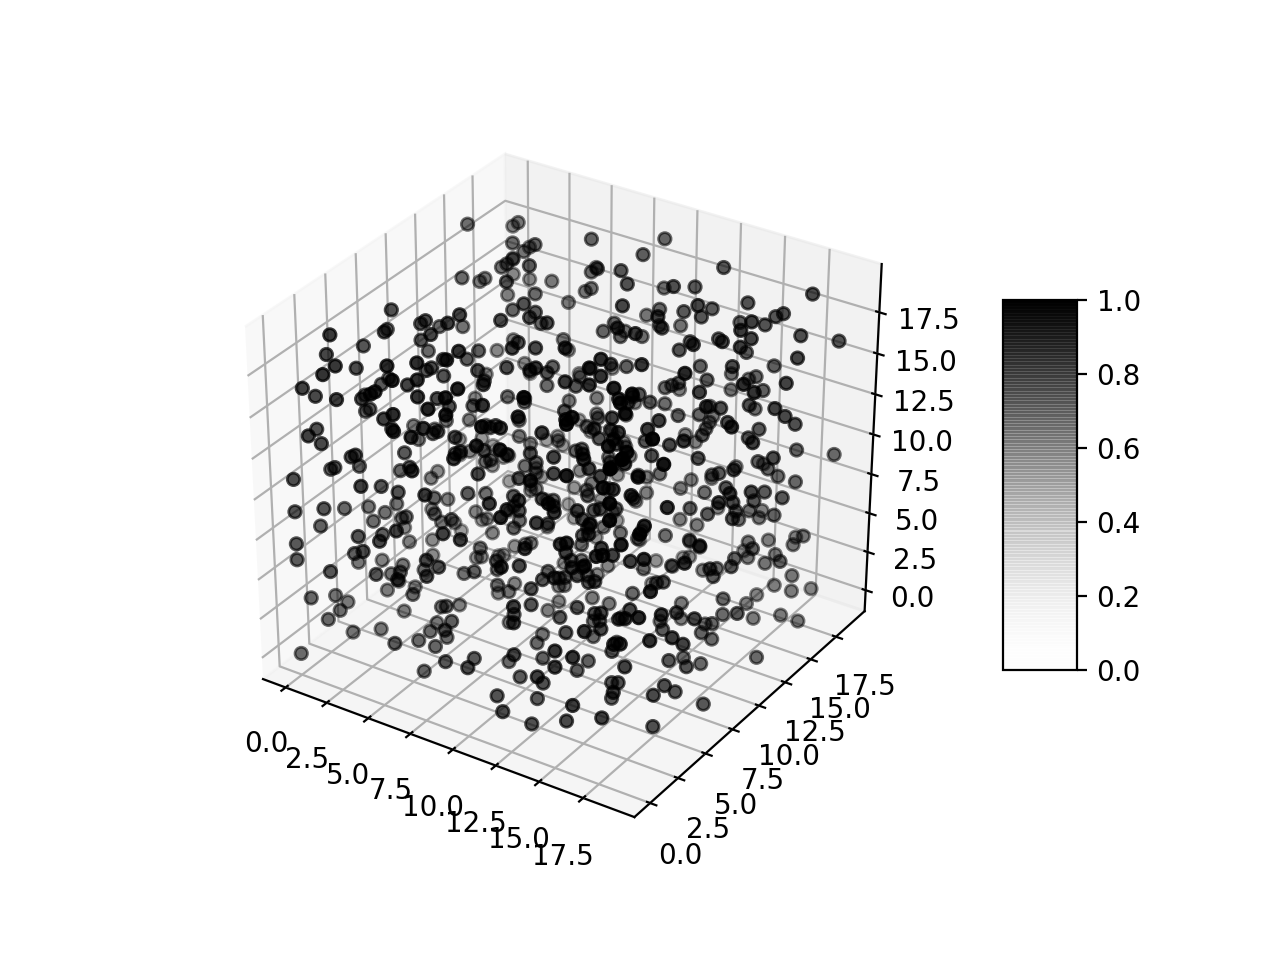

In [44]:
X, Y, Z = np.mgrid[0:20, 0:20, 0:20]

T = np.exp(-X**2 - Y**2 - Z**2)

cube = np.random.randint(0, 11, (20, 20, 20)) == 10

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
# scat = ax.scatter(X, Y, Z, c=T.flatten(), alpha=0.2, cmap='binary')
scat = ax.scatter(X, Y, Z, c=cube.flatten(), cmap=my_cmap)
fig.colorbar(scat, shrink=0.5, aspect=5)